In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConvolution2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

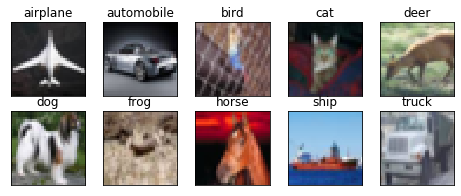

In [25]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [38]:
# Define the model
model = Sequential()
#model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
#model.add(Activation('relu'))
#model.add(Convolution2D(48, 3, 3))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Convolution2D(96, 3, 3, border_mode='same'))
#model.add(Activation('relu'))
#model.add(Convolution2D(96, 3, 3))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Convolution2D(192, 3, 3, border_mode='same'))
#model.add(Activation('relu'))
#model.add(Convolution2D(192, 3, 3))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(512))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(256))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))
####with depthwise seperable convolution; 
model.add(SeparableConvolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # input: 32x32x3 output: 32x32x48
#model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SeparableConvolution2D(48, 3, 3)) # 30x30x48
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  # 15x15x48
#model.add(Dropout(0.1))
model.add(SeparableConvolution2D(96, 3, 3, border_mode='same')) # 15x15x96
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.1))
model.add(SeparableConvolution2D(96, 3, 3)) #13x13x96
model.add(Activation('relu'))
model.add(BatchNormalization()) 
model.add(SeparableConvolution2D(192, 3, 3)) #11x11x192
model.add(Activation('relu'))
model.add(BatchNormalization()) 
model.add(SeparableConvolution2D(96, 3, 3)) #9x9x192
model.add(Activation('relu'))
model.add(BatchNormalization()) 
model.add(SeparableConvolution2D(96, 3, 3)) #7x7x96
model.add(Activation('relu'))
model.add(BatchNormalization()) 
#model.add(Dropout(0.1))
#model.add(MaxPooling2D(pool_size=(2, 2))) #6x6x96 
#model.add(Dropout(0.1))
#model.add(SeparableConvolution2D(192, 3, 3, border_mode='same')) #6x6x192
#model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(SeparableConvolution2D(48, 3, 3))  # 5x5x48
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConvolution2D(24, 3, 3))  # 3x3x24
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(SeparableConvolution2D(12, 3, 3))  # 1x1x12
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2))) #2x2x48
model.add(Dropout(0.1))
model.add(SeparableConvolution2D(10, 1, 1))  # 1x1x10
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2))) #2x2x48
model.add(Dropout(0.15))
model.add(Flatten())
#model.add(Dense(96))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.15))
#model.add(Dense(256))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.15))
#model.add(Dense(num_classes, activation='softmax'))
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `SeparableConv2D` call to the Keras

In [39]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_74 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
activation_79 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_73 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
separable_conv2d_75 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
activation_80 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
batch_normalization_74 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 15, 15, 48)      

Epoch 1/50
  2/390 [..............................] - ETA: 31s - loss: 0.8212 - acc: 0.7422

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


390/390 [==============================] - 21s 53ms/step - loss: 0.8334 - acc: 0.7144 - val_loss: 0.7887 - val_acc: 0.7350
Epoch 2/50
390/390 [==============================] - 21s 53ms/step - loss: 0.7948 - acc: 0.7285 - val_loss: 0.8243 - val_acc: 0.7317
Epoch 3/50
390/390 [==============================] - 21s 54ms/step - loss: 0.7665 - acc: 0.7387 - val_loss: 0.7861 - val_acc: 0.7459
Epoch 4/50
390/390 [==============================] - 21s 54ms/step - loss: 0.7235 - acc: 0.7513 - val_loss: 0.7542 - val_acc: 0.7612
Epoch 5/50
390/390 [==============================] - 21s 54ms/step - loss: 0.7000 - acc: 0.7577 - val_loss: 0.7913 - val_acc: 0.7467
Epoch 6/50
390/390 [==============================] - 21s 54ms/step - loss: 0.6755 - acc: 0.7648 - val_loss: 0.7703 - val_acc: 0.7589
Epoch 7/50
390/390 [==============================] - 21s 54ms/step - loss: 0.6607 - acc: 0.7705 - val_loss: 0.7815 - val_acc: 0.7499
Epoch 8/50
390/390 [==============================] - 21s 54ms/step - los

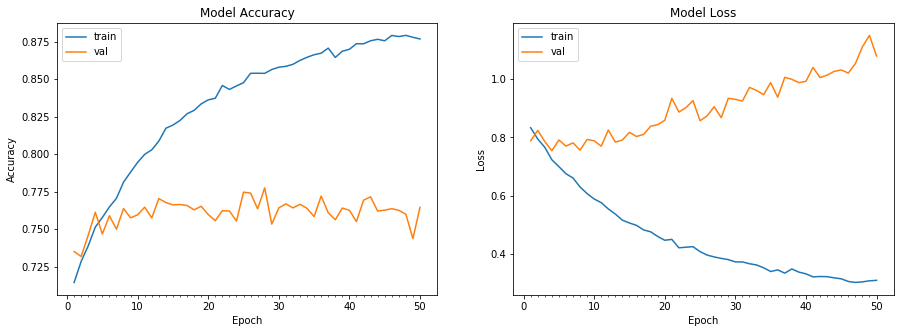

Accuracy on test data is: 76.45


In [41]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


 # train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))